<a href="https://colab.research.google.com/github/mars241/Machine-Learning/blob/main/Corrig%C3%A9_du_ML_Classifications__Decision_Tree(Arbre_de_d%C3%A9cision).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees
Within this challenge, we're going to use decision trees in both a classification sense and a regression sense and visualize each of these representations. In this challenge, we will be using the `mpg` dataset.

## Regression Trees

In [ ]:
# Load in the necessary libraries and the dataset
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

data = sns.load_dataset("mpg")

# Drop the rows with missing values
# Drop the "name" column
# Transform the "origin" column to represent the following:
#   USA = 0, Japan = 1, Europe = 2

In [ ]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
# Drop the rows with missing values

data.dropna(inplace = True)

In [ ]:
# Drop the "name" column

data.drop(columns = ['name'], inplace = True)

In [ ]:
# Transform the "origin" column to represent the following:
#   USA = 0, Japan = 1, Europe = 2

from sklearn.preprocessing import OrdinalEncoder

Oencod = OrdinalEncoder(categories = [["usa", "japan", "europe"]])
data["origin_encod"] = Oencod.fit_transform(data[["origin"]])
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,origin_encod
0,18.0,8,307.0,130.0,3504,12.0,70,usa,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,usa,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,usa,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,usa,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,usa,0.0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,0.0
394,44.0,4,97.0,52.0,2130,24.6,82,europe,2.0
395,32.0,4,135.0,84.0,2295,11.6,82,usa,0.0
396,28.0,4,120.0,79.0,2625,18.6,82,usa,0.0


In [ ]:
# Split into train and test splits using the "mpg" column as target, random state of 42 and a test size of 20%

In [ ]:
X = data.select_dtypes('number').drop(columns = 'mpg')
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 42)

In [ ]:
# Fit a decision tree

from sklearn.tree import DecisionTreeRegressor
modelDTR = DecisionTreeRegressor()
modelDTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Predict on the xtest set

modelDTR.predict(X_test)

array([25. , 19. , 31. , 33. , 27. , 27. , 12. , 31.5, 18. , 31. , 15. ,
       18. , 16. , 28. , 17. , 27. , 18. , 32.4, 31.3, 37. , 23.8, 36. ,
       31. , 17. , 31. , 28. , 19. , 18. , 27. , 25. , 16. , 20.2, 23. ,
       28. , 14. , 31. , 10. , 25. , 14. , 13. , 14. , 28. , 34. , 25. ,
       16. , 11. , 18. , 46.6, 25. , 33. , 14. , 21. , 23. , 37. , 38. ,
       16. , 15.5, 19. , 24. , 23. , 11. , 19. , 28.4, 22. , 23.9, 26. ,
       25.5, 33. , 23. , 14. , 25. , 14. , 23.8, 19. , 20.8, 24. , 13. ,
       17. , 24. ])

In [ ]:
# Print out the R2 score.
print(modelDTR.score(X_train,y_train))
print(modelDTR.score(X_test,y_test))

1.0
0.7640968784622345


In [ ]:
# Print each feature with importance %

# solution 1
for i in range(0,len(X.columns)):
    print(f'Colonne :{X.columns[i]} \nImportance %: {round(modelDTR.feature_importances_[i] * 100,2)} \n')

Colonne :cylinders 
Importance %: 0.41 

Colonne :displacement 
Importance %: 63.02 

Colonne :horsepower 
Importance %: 17.33 

Colonne :weight 
Importance %: 6.13 

Colonne :acceleration 
Importance %: 2.42 

Colonne :model_year 
Importance %: 10.39 

Colonne :origin_encod 
Importance %: 0.3 



In [ ]:
# solution 2
DF_impfeat = pd.DataFrame({"columns": X.columns,
                           "imp_features": modelDTR.feature_importances_})
DF_impfeat.sort_values("imp_features", ascending=False)

,columns,imp_features
1,displacement,0.630187
2,horsepower,0.173292
5,model_year,0.103898
3,weight,0.061324
4,acceleration,0.024164
0,cylinders,0.004097
6,origin_encod,0.003039


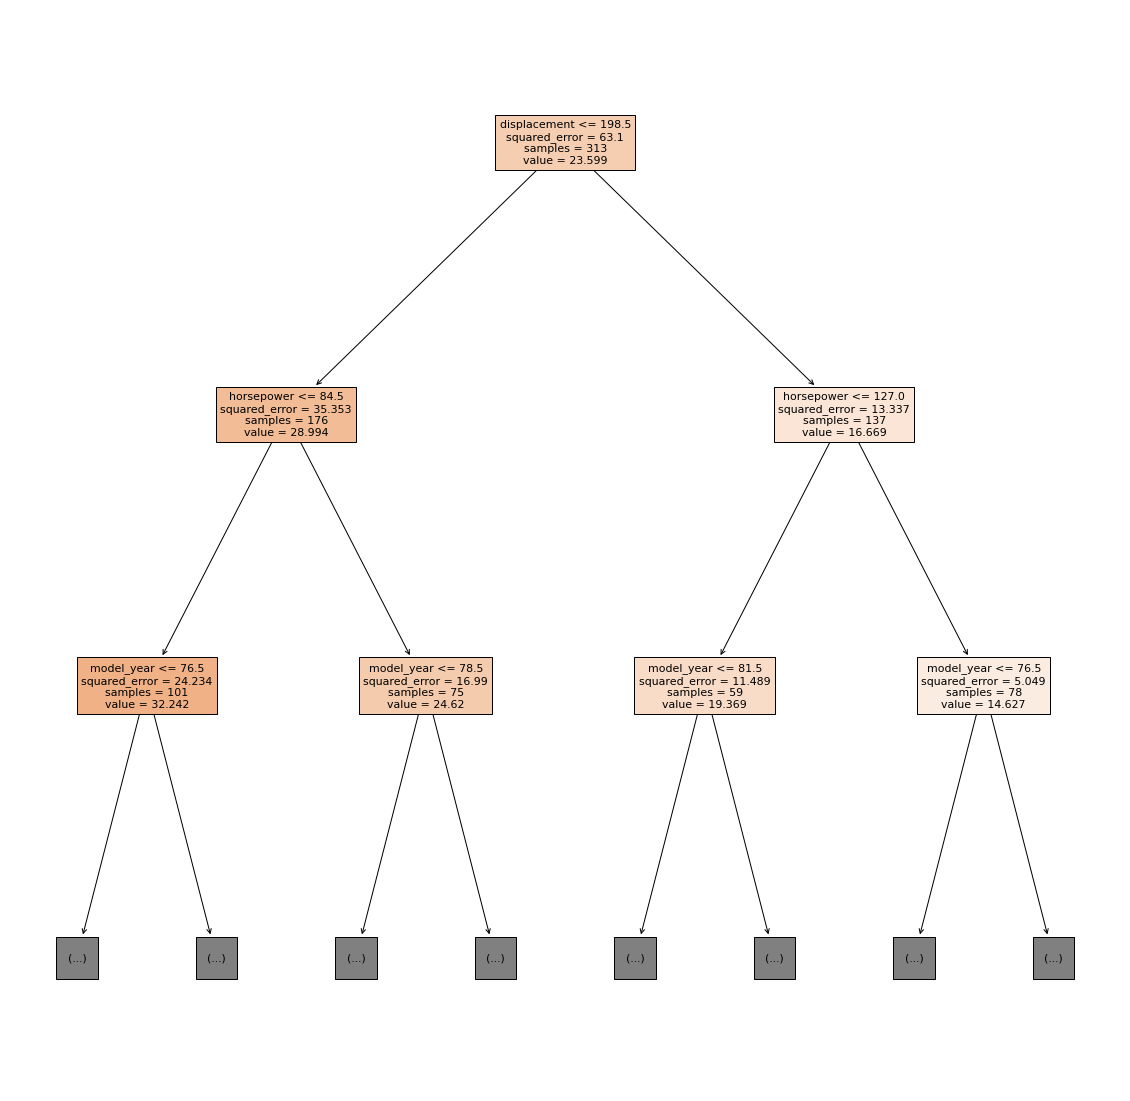

In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2

plt.figure(figsize = (20,20))
tree.plot_tree(modelDTR, max_depth = 2, filled = True,
          feature_names = X.columns )
plt.show()

## Classification Trees

In [ ]:
# Load in the Penguins dataset
data_penguins = sns.load_dataset('penguins')

# Drop rows with missing values
# Turn the species column into numeric
# Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2

# Turn the island column into numeric
# Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

data_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
# Drop rows with missing values

data_penguins.dropna(inplace = True)

In [ ]:
# Turn the species column into numeric
# Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2

Oencod = OrdinalEncoder(categories = [["Adelie", "Chinstrap", "Gentoo"]])
data_penguins["species"] = Oencod.fit_transform(data_penguins[["species"]])
data_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,0.0,Torgersen,39.5,17.4,186.0,3800.0,Female
2,0.0,Torgersen,40.3,18.0,195.0,3250.0,Female
4,0.0,Torgersen,36.7,19.3,193.0,3450.0,Female
5,0.0,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,2.0,Biscoe,47.2,13.7,214.0,4925.0,Female
340,2.0,Biscoe,46.8,14.3,215.0,4850.0,Female
341,2.0,Biscoe,50.4,15.7,222.0,5750.0,Male
342,2.0,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
# Turn the island column into numeric
# Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

Oencod = OrdinalEncoder(categories = [["Torgersen", "Biscoe", "Dream"]])
data_penguins["island"] = Oencod.fit_transform(data_penguins[["island"]])
data_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,0.0,39.1,18.7,181.0,3750.0,Male
1,0.0,0.0,39.5,17.4,186.0,3800.0,Female
2,0.0,0.0,40.3,18.0,195.0,3250.0,Female
4,0.0,0.0,36.7,19.3,193.0,3450.0,Female
5,0.0,0.0,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,2.0,1.0,47.2,13.7,214.0,4925.0,Female
340,2.0,1.0,46.8,14.3,215.0,4850.0,Female
341,2.0,1.0,50.4,15.7,222.0,5750.0,Male
342,2.0,1.0,45.2,14.8,212.0,5200.0,Female


In [ ]:
# Using a random state of 42 and a test size of 0.20, as well as "sex" as the output, split in training and testing sets

X_penguins = data_penguins.select_dtypes('number')
y_penguins = data_penguins['sex']

X_penguins_train, X_penguins_test, y_penguins_train, y_penguins_test = train_test_split(X_penguins, y_penguins,\
                                                                                        train_size = 0.80, random_state = 42)


In [ ]:
# Using a random state of 42, fit the classification tree.

from sklearn.tree import DecisionTreeClassifier
modelDTC = DecisionTreeClassifier(random_state = 42)
modelDTC.fit(X_penguins_train, y_penguins_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Print the predictions on the test set

modelDTC.predict(X_penguins_test)

array(['Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Female'], dtype=object)

In [ ]:
# Print the accuracy score for the predictions
print(modelDTC.score(X_penguins_train,y_penguins_train))
print(modelDTC.score(X_penguins_test,y_penguins_test))

1.0
0.8805970149253731


In [ ]:
# Print each feature with importance %

for i in range(0,len(X_penguins.columns)):
    print(f'Colonne :{X_penguins.columns[i]} \nImportance %: {round(modelDTC.feature_importances_[i] * 100,2)} \n')

Colonne :species 
Importance %: 0.0 

Colonne :island 
Importance %: 0.0 

Colonne :bill_length_mm 
Importance %: 9.24 

Colonne :bill_depth_mm 
Importance %: 48.18 

Colonne :flipper_length_mm 
Importance %: 2.41 

Colonne :body_mass_g 
Importance %: 40.17 



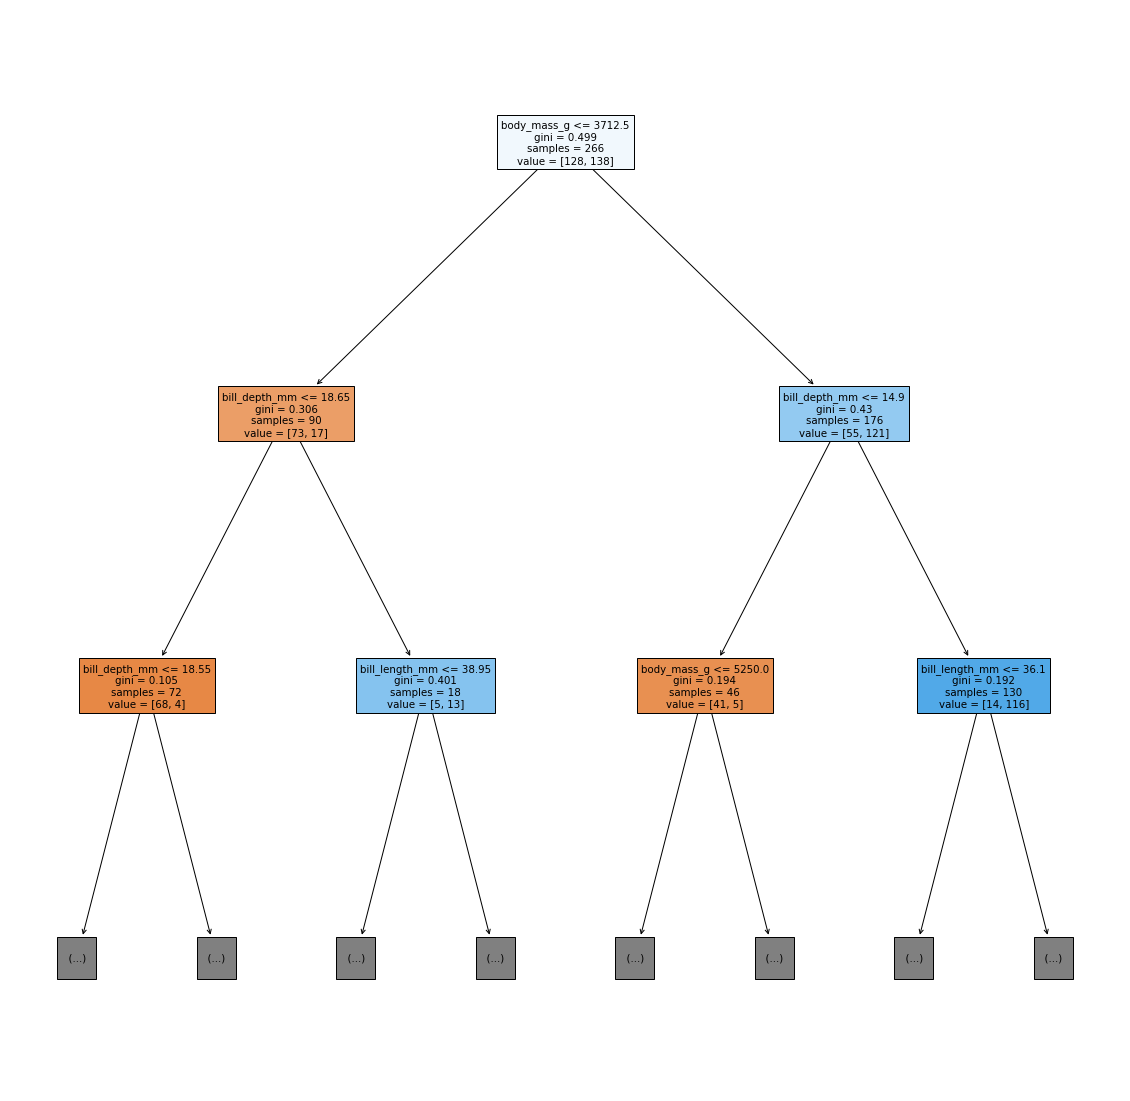

In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2

plt.figure(figsize = (20,20))
tree.plot_tree(modelDTC, max_depth = 2, filled = True,
          feature_names = X_penguins.columns)
plt.show()

# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!*** Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).


Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.

In [ ]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))

list_of_accuracies_train = []
list_of_accuracies_test = []
max_depth = range(1, 11)

for i in range(1, 11):
    modelDTC = DecisionTreeClassifier(random_state = 42, max_depth = i)
    modelDTC.fit(X_penguins_train, y_penguins_train)
    accuracy_train = modelDTC.score(X_penguins_train, y_penguins_train)
    accuracy_test = modelDTC.score(X_penguins_test, y_penguins_test)
    list_of_accuracies_train.append(accuracy_train)
    list_of_accuracies_test.append(accuracy_test)

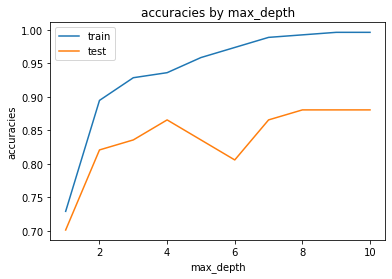

In [ ]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.

plt.plot(max_depth,list_of_accuracies_train, label="train")
plt.plot(max_depth,list_of_accuracies_test, label="test")
plt.legend()
plt.title('accuracies by max_depth')
plt.ylabel('accuracies')
plt.xlabel('max_depth')
plt.show()